In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)  # since the file will include more than 5000 lines we want to limit the max row number to display
from datetime import datetime
import pytz
import tarfile
import spacy

import gensim
from gensim import corpora

#import gensim
#from gensim import corpora
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis.gensim_models
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from matplotlib import pyplot as plt
print(datetime.today().strftime("%d-%b-%Y %a"), "Project Milestone 2 Notebook")
tz_Suisse = pytz.timezone('Europe/Zurich')
current_time= datetime.now(tz_Suisse)
print("Lausanne Time : ", current_time.strftime("%H:%M:%S"))

23-Dec-2022 Fri Project Milestone 2 Notebook
Lausanne Time :  20:15:53


In [2]:
USA_df = pd.read_csv("USA_Beer_Advocate.csv")
USA_df.drop(columns="Unnamed: 0", inplace=True)
USA_RB_df = pd.read_csv("USA_Rate_Beer.csv")
USA_RB_df.drop(columns="Unnamed: 0", inplace=True)

In [3]:
USA_RB_df.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text,user_location,brewery_location
0,Ale Asylum Ambergeddon,59933,Ale Asylum,6879,Amber Ale,2009-07-19 10:00:00,Cletus,17111,15,3.8,Pours copper with a thin white head. Smells o...,"United States, Connecticut","United States, Wisconsin"
1,Ale Asylum Ballistic IPA,98735,Ale Asylum,6879,India Pale Ale (IPA),2011-02-24 11:00:00,Cletus,17111,15,3.7,Bottle courtesy of ughsmash. Pours brown with...,"United States, Connecticut","United States, Wisconsin"
2,Ale Asylum Contorter Porter,59932,Ale Asylum,6879,Porter,2010-08-04 10:00:00,Cletus,17111,14,3.4,Bottle courtesy of motortoddhead. Pours dark ...,"United States, Connecticut","United States, Wisconsin"


In [4]:
USA_df.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,overall,rating,text,user_location,brewery_location
0,Brewer's Reserve Bourbon Barrel Barleywine,41300,Central Waters Brewing Co.,652,American Barleywine,2011-12-04 11:00:00,nmann08,nmann08.184925,4.0,4.09,"2011 VintageFrom a bottle, pours a very murky ...","United States, Washington","United States, Wisconsin"
1,Peruvian Morning,40775,Central Waters Brewing Co.,652,American Double / Imperial Stout,2013-07-20 10:00:00,nmann08,nmann08.184925,4.0,4.19,"2011 Vintage.Pours a dark brown, almost black....","United States, Washington","United States, Wisconsin"
2,Glacial Trail IPA,42189,Central Waters Brewing Co.,652,American IPA,2012-11-17 11:00:00,ferrari29,ferrari29.320392,3.5,3.48,Beer Poured: from bottle into Lagunitas IPA gl...,"United States, Illinois","United States, Wisconsin"


In [5]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

'''
To show most frequent words in the reviews and their counts
param x: list
param terms: int
'''
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

/var/folders/6s/ck9dfmpx05zfky75grq_ffn00000gn/T/ipykernel_73660/2530443132.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  USA_df['text'] = USA_df['text'].str.replace("[^a-zA-Z#]", " ")


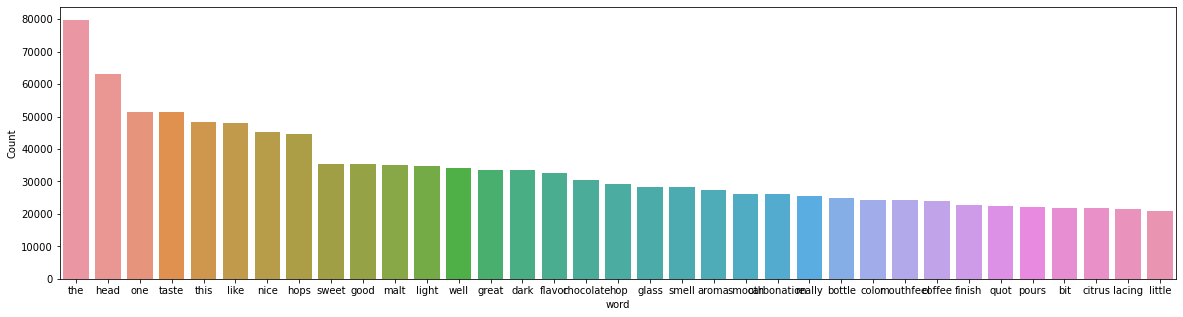

In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

'''
Function to remove stopwords
param x: list
param terms: int
'''
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

common_words = ["beer", "the"]

'''
Function to remove words beer and the
param x: list
'''
# function to remove stopwords
def remove_commonwords(rev):
  rev_new = " ".join([i for i in rev if i not in common_words])
  return rev_new

# replace "n't" with " not"
USA_df['text'] = USA_df['text'].str.replace("n\'t", " not")
# remove unwanted characters, numbers and symbols
USA_df['text'] = USA_df['text'].str.replace("[^a-zA-Z#]", " ")

# Cleaning the dataframe for errors mostly caused by NaN representing empty cells
USA_df.dropna(inplace = True)
# remove short words (length < 3)
USA_df['text'] = USA_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in USA_df[USA_df['overall'] == 5]["text"]]
reviews = [remove_commonwords(r.split()) for r in reviews]
# make entire text lowercase
reviews = [r.lower() for r in reviews]

freq_words(reviews, 35)

/var/folders/6s/ck9dfmpx05zfky75grq_ffn00000gn/T/ipykernel_73660/1193191096.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  USA_RB_df['text'] = USA_RB_df['text'].str.replace("[^a-zA-Z#]", " ")


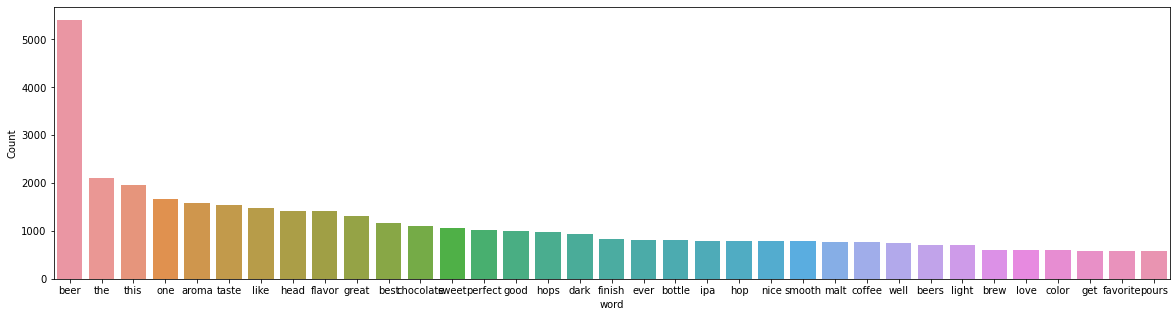

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

     
# replace "n't" with " not"
USA_RB_df['text'] = USA_RB_df['text'].str.replace("n\'t", " not")
# remove unwanted characters, numbers and symbols
USA_RB_df['text'] = USA_RB_df['text'].str.replace("[^a-zA-Z#]", " ")

# Cleaning the dataframe for errors mostly caused by NaN representing empty cells
USA_RB_df.dropna(inplace = True)
# remove short words (length < 3)
USA_RB_df['text'] = USA_RB_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews_rb = [remove_stopwords(r.split()) for r in USA_RB_df[USA_RB_df['rating'] == 5]["text"]]
# make entire text lowercase
reviews_rb = [r.lower() for r in reviews_rb]

freq_words(reviews_rb, 35)

In [8]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
'''
Function to lemmatize words
param x: list
param tags: list
'''
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['poured', 'bottle', 'snifter', 'received', 'birthday', 'bif', 'thanks', 'dunt', 'thanks', 'ryan', 'big', 'want', 'pours', 'dark', 'brown', 'color', 'high', 'carbonation', 'evident', 'two', 'inches', 'tan', 'head', 'last', 'minutes', 'inch', 'lasts', 'throughout', 'drink', 'leaves', 'light', 'lacing', 'smells', 'bourbon', 'sweet', 'chocolate', 'coffee', 'roasted', 'malts', 'vanilla', 'oak', 'very', 'complex', 'balanced', 'full', 'fresh', 'coffee', 'sweet', 'chocolate', 'vanilla', 'bourbon', 'smells', 'amazing', 'tastes', 'bourbon', 'coffee', 'sweet', 'vanilla', 'sweet', 'chocolate', 'roasted', 'malts', 'oak', 'bourbon', 'coffee', 'jump', 'taste', 'neither', 'dominate', 'nice', 'again', 'pretty', 'balanced', 'thought', 'oak', 'wood', 'came', 'taste', 'smell', 'very', 'nice', 'medium', 'body', 'moderate', 'carbonation', 'smooth', 'creamy', 'real', 'heat', 'tiny', 'bit', 'carbonated', 'would', 'liked', 'overall', 'thought', 'fantastic', 'barrel', 'aged', 'stout', 'really', 'liked', 'balan

In [9]:
tokenized_reviews_rb = pd.Series(reviews_rb).apply(lambda x: x.split())
print(tokenized_reviews_rb[1])

['far', 'favorite', 'ipa', 'current', 'full', 'smooth', 'flavor', 'dominated', 'fruity', 'undertones', 'musty', 'aroma', 'lessend', 'with', 'use', 'belgian', 'hops', 'ipa', 'hits', 'pallet', 'smoother', 'traditional', 'ipa', 'leaves', 'much', 'cleaner', 'aftertaste', 'starting', 'almost', 'bubblegum', 'flavor', 'beer', 'transforms', 'bitter', 'citrus', 'flavor', 'stays', 'mouth', 'till', 'next', 'drink', 'highly', 'recommended']


In [10]:
# let us get the lemmatized list of reviews
reviews_2 = lemmatization(tokenized_reviews)
reviews_rb2 = lemmatization(tokenized_reviews_rb)

In [11]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=5, 
                random_state=100,
                chunksize=1000,
                passes=50)
     
# let us print topics with their list of words     
lda_model.print_topics()

[(0,
  '0.022*"wheat" + 0.021*"fruit" + 0.018*"sour" + 0.017*"yeast" + 0.016*"flavor" + 0.014*"tart" + 0.014*"light" + 0.013*"belgian" + 0.011*"note" + 0.011*"banana"'),
 (1,
  '0.029*"nice" + 0.026*"head" + 0.025*"malt" + 0.022*"light" + 0.018*"hop" + 0.017*"good" + 0.017*"flavor" + 0.015*"sweet" + 0.015*"taste" + 0.014*"great"'),
 (2,
  '0.032*"chocolate" + 0.031*"dark" + 0.025*"coffee" + 0.020*"flavor" + 0.018*"brown" + 0.018*"black" + 0.016*"head" + 0.016*"stout" + 0.014*"sweet" + 0.013*"malt"'),
 (3,
  '0.031*"hop" + 0.024*"citrus" + 0.020*"grapefruit" + 0.020*"pine" + 0.019*"fruit" + 0.017*"ipa" + 0.015*"tropical" + 0.014*"fresh" + 0.014*"flavor" + 0.013*"bitter"'),
 (4,
  '0.024*"good" + 0.020*"beer" + 0.018*"taste" + 0.014*"time" + 0.013*"great" + 0.012*"bottle" + 0.011*"brewery" + 0.010*"year" + 0.009*"ale" + 0.009*"first"')]

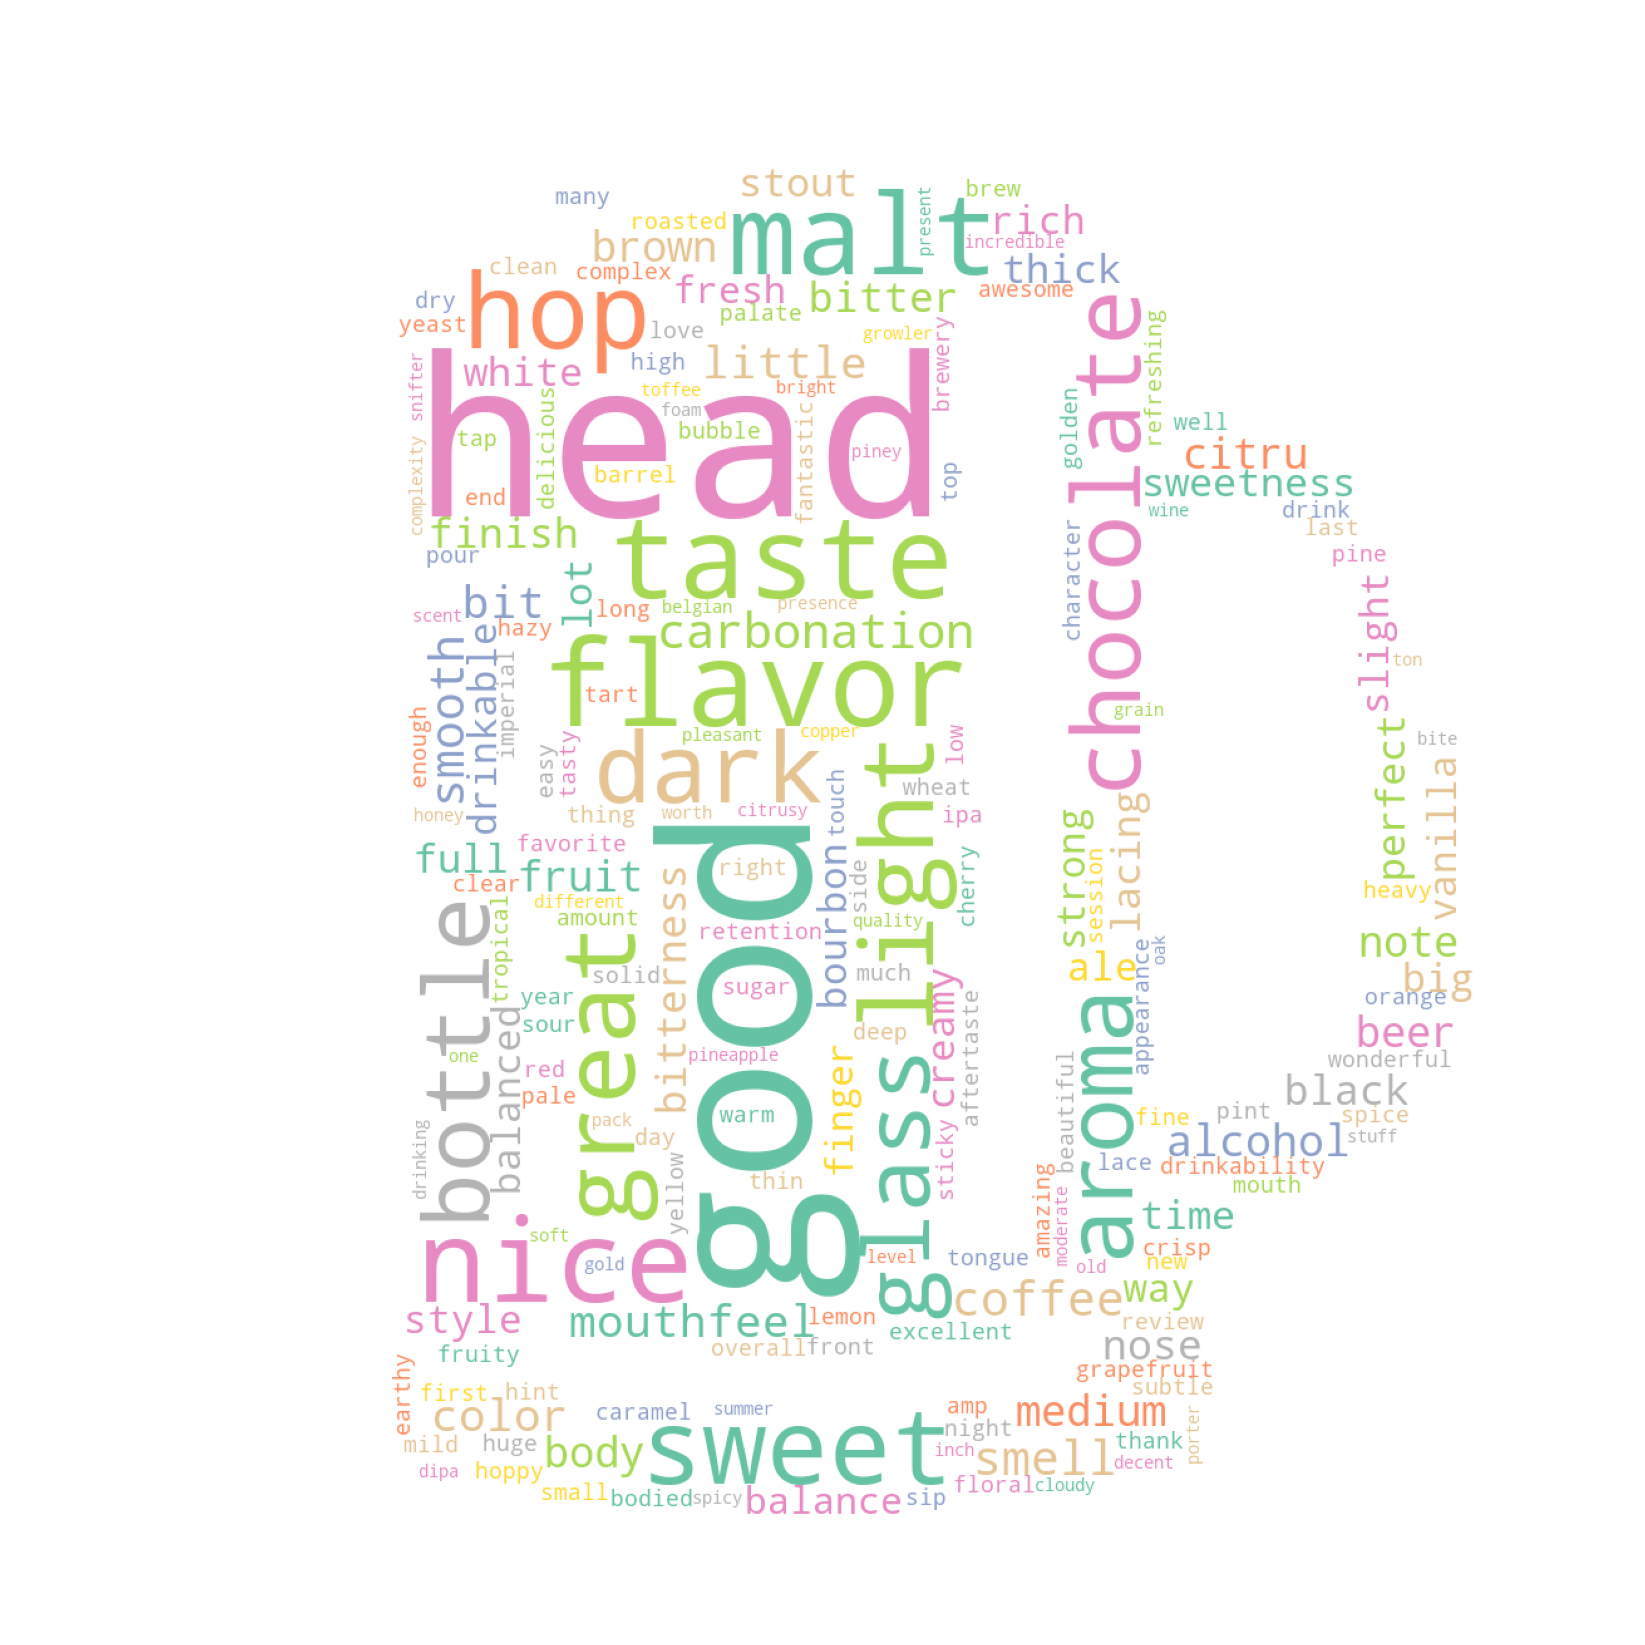

In [12]:
# Define a function to plot word cloud
"""
params wordcloud: wordcloud object
"""
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

# Import package
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
# Import image to np.array
mask = np.array(Image.open('beer.jpeg'))
# Generate wordcloud
unique_string = ""
for item in reviews_2:
    unique_sentence=(" ").join(item)
    unique_string = unique_string + " " + unique_sentence
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(unique_string)
# Plot
plot_cloud(wordcloud)

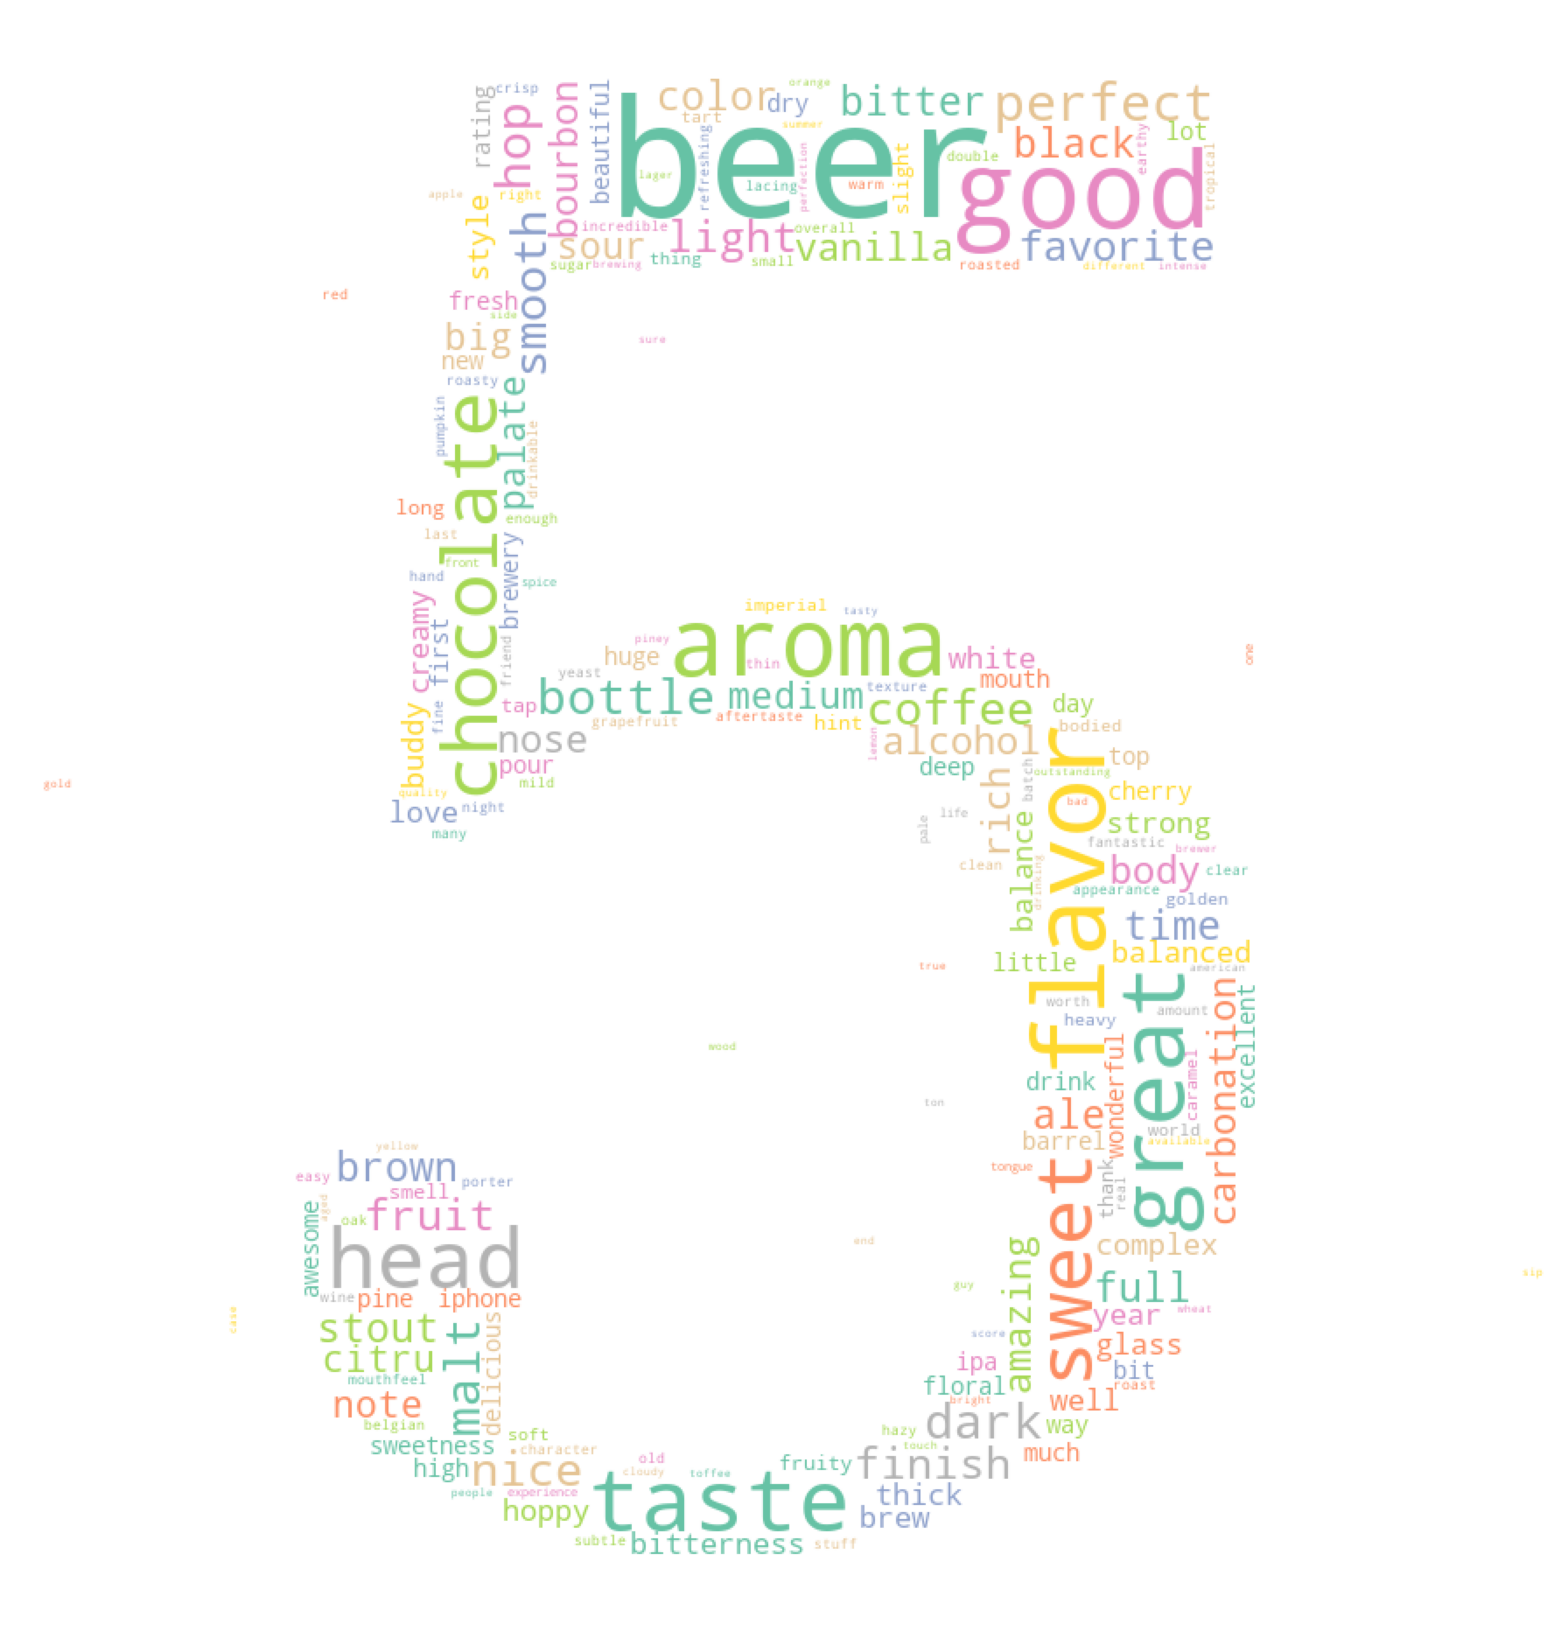

In [13]:
# Import image to np.array
mask = np.array(Image.open('bess.png'))
# Generate wordcloud
unique_string = ""
for item in reviews_rb2:
    unique_sentence=(" ").join(item)
    unique_string = unique_string + " " + unique_sentence
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(unique_string)
# Plot
plot_cloud(wordcloud)

In [14]:
# Create the term dictionary_rb of our corpus, where every unique term is assigned an index
dictionary_rb = corpora.Dictionary(reviews_rb2)

# Convert list of reviews (reviews_rb2) into a Document Term Matrix using the dictionary_rb prepared above.
doc_term_matrix_rb = [dictionary_rb.doc2bow(rev) for rev in reviews_rb2]

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model_rb = LDA(corpus=doc_term_matrix_rb,
                id2word=dictionary_rb,
                num_topics=5, 
                random_state=100,
                chunksize=1000,
                passes=50)
     
lda_model_rb.print_topics()

[(0,
  '0.012*"year" + 0.009*"old" + 0.008*"batch" + 0.007*"last" + 0.006*"buffy" + 0.006*"day" + 0.006*"name" + 0.006*"late" + 0.005*"brewer" + 0.005*"first"'),
 (1,
  '0.027*"chocolate" + 0.022*"dark" + 0.021*"coffee" + 0.021*"flavor" + 0.018*"sweet" + 0.017*"head" + 0.016*"aroma" + 0.014*"brown" + 0.013*"black" + 0.013*"stout"'),
 (2,
  '0.056*"beer" + 0.030*"hop" + 0.025*"aroma" + 0.024*"flavor" + 0.024*"great" + 0.020*"good" + 0.017*"perfect" + 0.015*"citrus" + 0.014*"taste" + 0.013*"hoppy"'),
 (3,
  '0.033*"sour" + 0.024*"fruit" + 0.020*"cherry" + 0.016*"tart" + 0.013*"aroma" + 0.011*"wine" + 0.008*"brew" + 0.008*"apple" + 0.007*"funk" + 0.007*"dry"'),
 (4,
  '0.137*"beer" + 0.042*"good" + 0.022*"great" + 0.015*"taste" + 0.014*"favorite" + 0.012*"time" + 0.011*"ale" + 0.010*"brewery" + 0.009*"bottle" + 0.009*"love"')]

In [15]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ilkergul/opt/anaconda3/

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.058158  0.025666       1        1  33.020561
2     -0.039127  0.018890       2        1  27.222150
4      0.303844  0.051593       3        1  18.997069
3     -0.034969 -0.219166       4        1  11.906739
0     -0.171590  0.123017       5        1   8.853481, topic_info=             Term          Freq         Total Category  logprob  loglift
56      chocolate  28958.000000  28958.000000  Default  30.0000  30.0000
229           hop  32587.000000  32587.000000  Default  29.0000  29.0000
13           dark  31412.000000  31412.000000  Default  28.0000  28.0000
57         coffee  23214.000000  23214.000000  Default  27.0000  27.0000
1118       citrus  15785.000000  15785.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
7     carbonation   2265.784851  23082.131733   Topic5  -4.8748   0.1032
92          sweet   2402.622991  34983.721674   Topic5  -4.8162  -0.2540
53         bottle   2099.207495  20495.452900   Topic5  -4.9512   0.1457
115         aroma   2200.271616  29720.473495   Topic5  -4.9041  -0.1789
51            bit   1972.118382  19573.498179   Topic5  -5.0136   0.1293

[358 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
1704       5  0.999535     acidic
1411       5  0.998861    acidity
44         2  0.918299       aged
44         5  0.081340       aged
14292      4  0.995794  alchemist
...      ...       ...        ...
99         3  0.849582       year
1312       1  0.184026      yeast
1312       5  0.815941      yeast
1429       1  0.252645     yeasty
1429       5  0.746276     yeasty

[589 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_rb, doc_term_matrix_rb, dictionary_rb)
vis

/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ilkergul/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/ilkergul/opt/anaconda3/

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.162284  0.108236       1        1  34.305651
4     -0.057657 -0.231341       2        1  26.625931
2     -0.183825 -0.027545       3        1  23.459332
3      0.087573  0.212016       4        1   9.979750
0      0.316193 -0.061366       5        1   5.629338, topic_info=          Term         Freq        Total Category  logprob  loglift
22        beer  5641.000000  5641.000000  Default  30.0000  30.0000
452        hop   747.000000   747.000000  Default  29.0000  29.0000
63   chocolate   960.000000   960.000000  Default  28.0000  28.0000
45        good  1844.000000  1844.000000  Default  27.0000  27.0000
149     coffee   751.000000   751.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
353       part    17.467378    49.690805   Topic5  -5.8188   1.8317
218        tap    21.013291   224.734865   Topic5  -5.6340   0.5074
229       hand    18.871522   109.853466   Topic5  -5.7415   1.1157
563      other    16.987021    60.494900   Topic5  -5.8467   1.6071
59         big    18.036760   363.723783   Topic5  -5.7867  -0.1268

[320 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3468      4  0.976625    abbey
192       1  0.946845     aged
192       4  0.050906     aged
125       1  0.609322  alcohol
125       2  0.107527  alcohol
...     ...       ...      ...
949       2  0.165784    young
949       3  0.147364    young
949       4  0.239466    young
949       5  0.423670    young
2389      4  0.986828     zest

[459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 4, 1])